In [5]:
import sympy as sm

i, n= sm.symbols('i, n')
for k in range(0,3):
    
    f= sm.Sum( i**k, 
              (i, 1, n))
    
    結果= f.doit()
    
    print(f'k= {k}')
    print(f'f= {f}')
    display(f)
    display(結果)
    print("-"*10)

k= 0
f= Sum(1, (i, 1, n))


Sum(1, (i, 1, n))

n

----------
k= 1
f= Sum(i, (i, 1, n))


Sum(i, (i, 1, n))

n**2/2 + n/2

----------
k= 2
f= Sum(i**2, (i, 1, n))


Sum(i**2, (i, 1, n))

n**3/3 + n**2/2 + n/6

----------


In [6]:
from ryPat import *

In [51]:
def ϕ(x):
    y= sm.exp(-(x**2)/2) /sm.sqrt(2*π)
    return y

def f(x, μ=0, σ=1):
    y= ϕ((x-μ)/σ) / σ
    return y


x, μ= sm.symbols('x, μ')
σ=    sm.symbols('σ', positive=True)

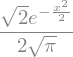

In [52]:
ϕ(x)

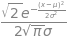

In [56]:
f(x, μ, σ).simplify()

In [57]:
# integration of pdf should be 1
(
f(x,μ,σ)
.integrate(
    (x,-sm.oo,sm.oo))
)

In [61]:
# E[X]=
E_X= (
    (x*f(x,μ,σ))
    .integrate(
        (x,-sm.oo,sm.oo))
).simplify()

# E[X**2]=
E_XX= (
    ((x**2)*f(x,μ,σ))
    .integrate(
        (x,-sm.oo,sm.oo))
).simplify()

# Var[X]=
Var_X= (
    (((x-μ)**2)*f(x,μ,σ))
    .integrate(
        (x,-sm.oo,sm.oo))
).simplify()

# Mode[X]= 
Mode_X= (
    sm.solve(
        f(x,μ,σ).diff(x),
        x)
)

display(E_X)
display(E_XX)
display(Var_X)
display(Mode_X)

In [33]:
import scipy.special
#scipy.special.comb?

In [67]:
# version 1: 僅使用 陽春的 Python
def binomial_coefficient(n, k):
    '''
    using recursive method
    '''
    if k < 0 or k > n:
        c= 0
    elif k in [0, n]:
        c= 1    
    else:
        k= min(k, n - k)  # 善用對稱性
        c= 1
        for i in range(k):
            c = c * (n - i) // (i + 1) 
            
    return c

n=  10
v1= [binomial_coefficient(n,k) for k in range(n+1)]
#----------------------------------------------------------

# version 2
import math as mt

def binomial_coefficient_v2(n, k):
    c= mt.factorial(n) // (mt.factorial(k) * mt.factorial(n - k))
    return c 

#n= 10
v2= [binomial_coefficient_v2(n,x) for x in range(n+1)]
#----------------------------------------------------------

# version 3
import scipy.special as sp
binomial_coefficient_v3= sp.comb

#n= 10
v3= [int(binomial_coefficient_v3(n,k)) for k in range(n+1)]
#----------------------------------------------------------

v1,v2,v3

([1, 10, 45, 120, 210, 252, 210, 120, 45, 10, 1],
 [1, 10, 45, 120, 210, 252, 210, 120, 45, 10, 1],
 [1, 10, 45, 120, 210, 252, 210, 120, 45, 10, 1])

In [80]:
# version 4: 僅使用 陽春的 Python
def binomial_coefficient_v4(n, k):
    '''
    using recursive method
    '''
    if k < 0 or k > n:
        c= 0
    elif k in [0, n]:
        c= 1    
    else:
        k= min(k, n - k)  # 善用對稱性
        
        #c= 1
        #for i in range(k):
        #    c = c * (n - i) // (i + 1) 
        c= binomial_coefficient_v4(n-1, k) + binomial_coefficient_v4(n-1, k-1)     
    return c

n=  20
v4= [binomial_coefficient_v4(n,k) for k in range(n+1)]
#----------------------------------------------------------
v4

[1,
 20,
 190,
 1140,
 4845,
 15504,
 38760,
 77520,
 125970,
 167960,
 184756,
 167960,
 125970,
 77520,
 38760,
 15504,
 4845,
 1140,
 190,
 20,
 1]

In [115]:
import sympy as sm

n=  10
v4= [sm.binomial(n,k) for k in range(n+1)]
v4

[1, 10, 45, 120, 210, 252, 210, 120, 45, 10, 1]

In [149]:
# Negative Binomial ??
v5= [sm.binomial(-n, k) for k in range(n+1)]
v5

[1, -10, 55, -220, 715, -2002, 5005, -11440, 24310, -48620, 92378]

In [150]:
x= sm.symbols('x')
f= (1+x)**(-n)
f

(x + 1)**(-10)

In [151]:
f.expand()

1/(x**10 + 10*x**9 + 45*x**8 + 120*x**7 + 210*x**6 + 252*x**5 + 210*x**4 + 120*x**3 + 45*x**2 + 10*x + 1)

In [152]:
# 這是 Taylor 級數展開，直接用長除法就可，但長度(亦即項數)會趨近無限。
f.series()  

1 - 10*x + 55*x**2 - 220*x**3 + 715*x**4 - 2002*x**5 + O(x**6)

In [251]:
# 據說 n 不但 【負數】 可以
n= -10
k= 3
sm.binomial(n, k)

-220

In [252]:
#連 【複數】 都很可以！！！
n= 1 + sm.I
ak= sm.binomial(n, k)
ak

-I/3

In [253]:
(1+x)**(n)

(x + 1)**(1 + I)

In [254]:
f= ((1+x)**(n)).series()
f

1 + x*(1 + I) + I*x**2*(1 + I)/2 + I*x**3*(-1 + I)*(1 + I)/6 + I*x**4*(-2 + I)*(-1 + I)*(1 + I)/24 + I*x**5*(-3 + I)*(-2 + I)*(-1 + I)*(1 + I)/120 + O(x**6)

In [255]:
bk= f.as_poly().coeff_monomial(x**k)
bk

-I/3

In [256]:
ak==bk

True

In [260]:
# 觀察上式中 x**3 的係數為 i * (-1+i) * (1+i) /6
# 化簡如下：
i= sm.I
bk= (i * (-1+i) * (1+i) /6).simplify()
bk

-I/3

In [261]:
# 自動從 f (以多項式看待) 中撈出，如下：
bk= f.as_poly().coeff_monomial(x**k)
bk

-I/3

In [275]:
# 再加碼想一下，
# x**i
# 到底啥意思？？

q= 10**sm.I
q

10**I

In [276]:
q.evalf()

-0.668201510190313 + 0.743980336957493*I

In [277]:
q= 2**sm.I
q

2**I

In [278]:
q.evalf()

0.769238901363972 + 0.638961276313635*I

In [280]:
q= 1**sm.I
q.evalf()

1.00000000000000

In [281]:
q= 0**sm.I
q.evalf()

nan

In [282]:
q= sm.I**sm.I
q.evalf()

0.207879576350762

In [286]:
sm.exp(-sm.pi/2)

exp(-pi/2)

In [287]:
sm.exp(-sm.pi/2).evalf()

0.207879576350762

In [268]:
q2= (sm.cos(sm.log(10)) + sm.I *sm.sin(sm.log(10))).simplify()
q2

exp(I*log(10))

In [264]:
10**sm.I == sm.cos(sm.log(10)) + sm.I *sm.sin(sm.log(10))

False

In [272]:
q1.evalf()

-0.668201510190313 + 0.743980336957493*I

In [273]:
q2.evalf()

-0.668201510190313 + 0.743980336957493*I

In [274]:
q1.evalf() == q2.evalf()

True

In [391]:
# length of a curve

def f(x):
    y= sm.sqrt(1-x**2)
    return y
f(x)

sqrt(1 - x**2)

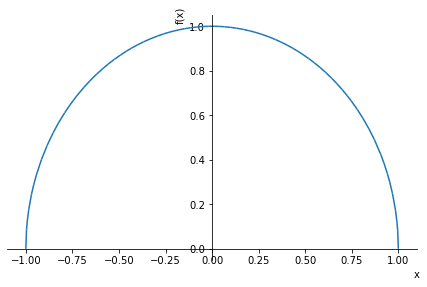

In [392]:
x= sm.symbols('x')
sm.plot(
    f(x),
    (x,-1,1))

In [393]:
# 長度
長度= sm.sqrt(
  1+(f(x).diff(x))**2
).integrate((x,-1,1))
長度

pi

In [394]:
#面積
面積= f(x).integrate((x,-1,1))
面積

pi/2

# sympy.stats.Binomial

In [556]:
import sympy.stats as st
p= sm.symbols('p', positive=True, real=True)
n, k, x= sm.symbols('n, k, x', positive=True, integer=True)
X= st.Binomial('X',n,p)

In [558]:
f= st.density(X)(x) #.subs({n:100, p:0.5})
f

Piecewise((p**x*(1 - p)**(n - x)*binomial(n, x), n >= x), (0, True))

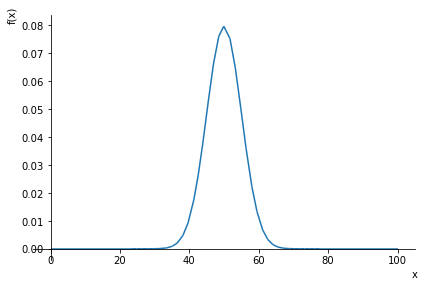

In [507]:
fg= sm.plot(f, (x,0,100), show=False)
fg.show()

# sm.plot 就是不夠好用 !!

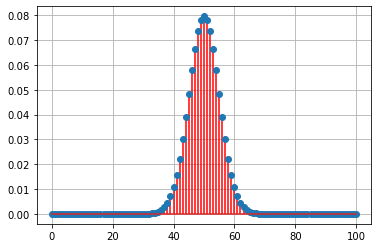

In [509]:
# 改回 matplotlib.pyplot ...
# 但有一些 衝突待解...

# 這一段進一步了解 sm.lambdify 的機制

import numpy as np
import matplotlib.pyplot as pl

xx= np.arange(0,101)
yy= sm.lambdify(x,f,  
                modules=['numpy', 
                         {'binomial':scipy.special.binom}]
               )(xx)
pl.stem(xx,yy,'ro')
pl.grid()

# 漂亮多了

In [513]:
st.E(X).simplify()

Sum(Piecewise((_k*p**_k*(1 - p)**(-_k)*(1 - p)**n*binomial(n, _k), _k <= n), (0, True)), (_k, 0, n))

In [550]:
q= sm.Sum(
    (k**2)*st.density(X)(k).subs({n:50, p:0.8}), 
    (k,0,50))
q

Sum(Piecewise((0.2**(50 - k)*0.8**k*k**2*binomial(50, k), k <= 50), (0, True)), (k, 0, 50))

In [551]:
q.doit()

1608.00000000000

In [554]:
st.E(X).subs({n:50, p:0.8}).doit()

40.0000000000000

In [555]:
st.variance(X).subs({n:50, p:0.8}).doit()


8.00000000000000

In [524]:

st.variance(X).simplify()

Sum(Piecewise((p**_k*(1 - p)**(-_k)*(1 - p)**n*(_k**2 - 2*_k*Sum(Piecewise((_k*p**_k*(1 - p)**(-_k)*(1 - p)**n*binomial(n, _k), _k <= n), (0, True)), (_k, 0, n)) + Sum(Piecewise((_k*p**_k*(1 - p)**(-_k)*(1 - p)**n*binomial(n, _k), _k <= n), (0, True)), (_k, 0, n))**2)*binomial(n, _k), _k <= n), (0, True)), (_k, 0, n))

In [510]:

#import scipy.special.binom?

In [ ]:
import scipy.special.binom

In [421]:

f= sm.binomial(n,k)*p**k*(1-p)**(n-k)
f

p**k*(1 - p)**(-k + n)*binomial(n, k)

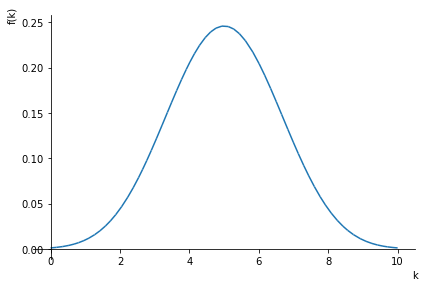

In [429]:
sm.plot(f.subs({n:10,p:0.5}),(k,0,10))

In [431]:
#st.density?